----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Exam II Partial (version B)
 
( 9th of January, 2020 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Please read the exercices carefully, write the necesary code and respond to all the questions. The code needs to be properly commented.

## Exercise 1  (3.5 points)

Given a query image `images/template.png` and a target image `images/target_image.png`, find the location of the query within the target image. 

<img src="images/best_match.png" width="300">

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import io
from skimage import exposure
from skimage import transform
from skimage import io, color, img_as_float, transform
from skimage.feature import match_template

from skimage import data
from skimage import transform as tf
from skimage import io
from skimage.feature import (match_descriptors, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np
from queue import PriorityQueue
import matplotlib.patches as patches
from skimage.util import img_as_float


**(a) (1.5 Points)** Perform a sliding windows of a query image `images/template.png` over the target image `images/target_image.png` to detect the location of the query in the image using the normalized cross-correlation as similarity metric (hint: `match_template() of skimage.feature').

## ANSWER
Ho he fet de les dues maneres

In [2]:
from skimage.feature import match_template
from skimage.color import rgb2gray

def match_cross_correlation(image, template):
    im_result_correlation = match_template(rgb2gray(image),rgb2gray(template))# we transform the images to gray and
    # we get the normalized cross correlation image
    return im_result_correlation



In [3]:
def visualize_matching(image, template, im_result_correlation, thres_cross_correl):
    image = rgb2gray(image)
    # we binarize the resultof the X-correlation to find the positions where the template is located
    image_bin=np.zeros([image.shape[0],image.shape[1]])
    # we save the maximum value of the image, this value will correspond to the zone with more proximity to the template
    valor =im_result_correlation.max()
    # then we set the bin image values to 1, using a threshold to show the corresponding pixels of the template
    image_bin[image <= valor-thres_cross_correl] = 255
    fig, axarr = plt.subplots(2,2)
    fig.set_size_inches(10,15)

    #imatge
    axarr[0][0].imshow(given_image,cmap='gray')
    axarr[0][0].set_title('Image')
    axarr[0][0].xaxis.set_visible(False)
    axarr[0][0].yaxis.set_visible(False)

    #imatge després
    axarr[0][1].imshow(im_result_correlation, cmap='gray')
    axarr[0][1].set_title('Norm. Cross-correlation matching')
    axarr[0][1].xaxis.set_visible(False)
    axarr[0][1].yaxis.set_visible(False)

    axarr[1][0].imshow(template, cmap='gray')
    axarr[1][0].set_title('Template')
    axarr[1][0].xaxis.set_visible(False)
    axarr[1][0].yaxis.set_visible(False)

    axarr[1][1].imshow(image_bin, cmap='gray')
    axarr[1][1].set_title('Norm. cross-correlation thresholded')
    axarr[1][1].xaxis.set_visible(False)
    axarr[1][1].yaxis.set_visible(False)

    plt.show()

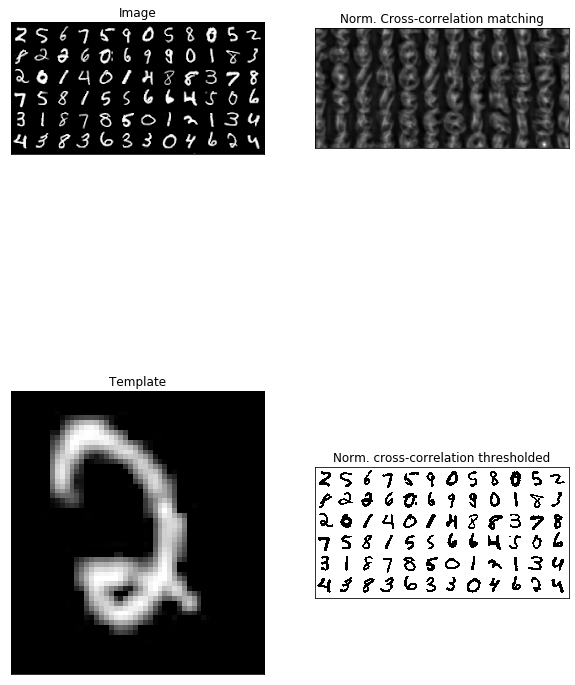

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data, io, img_as_float


%matplotlib inline

# Load images
template=io.imread('./images/template.png')
given_image=io.imread('./images/target_image.png')


im_result_correlation = match_cross_correlation(given_image, template)

visualize_matching(given_image, template, im_result_correlation, 0.7389)



In [5]:
def cross_correlation(image, template, threshold = 0.7):
    
    image = img_as_float(image)
    template = img_as_float(template)
    
    match = match_template(image, template)
    
    region = np.unravel_index(np.argmax(match), match.shape)
    x, y = region[::-1]
    matchx, matchy = template.shape
    rect = plt.Rectangle((x, y), matchy, matchx, edgecolor='r', facecolor='none')

    representation, position = plt.subplots(ncols=4, nrows=1,figsize=(10,20))
    position[0].imshow(template, cmap='gray')
    position[0].set_title('Template')
    position[1].add_patch(rect)
    position[1].imshow(image, cmap='gray')
    position[1].set_title('Einstein')
    position[2].imshow(match, cmap='gray')
    position[2].set_title('Cross Correlation')
    position[2].autoscale(False)
    position[2].plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
    position[3].imshow(match > threshold, cmap='gray')
    position[3].set_title('Threshold Correlation')

    plt.show()

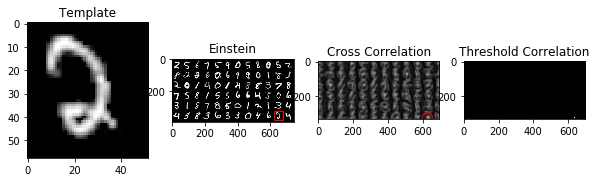

In [6]:
template=io.imread('./images/template.png')
given_image=io.imread('./images/target_image.png')
image_gray = color.rgb2gray(given_image)
template_gray = color.rgb2gray(template)

cross_correlation(image_gray, template_gray)

**(b) (2 Points)** Repeat the above detection using HOG. Perform a sliding windows over the target image and obtain the HOG descriptor for each region. Then compare with the HOG descriptor of the query image using an appropriate similarity measure, and show the location with highest similarity.

In order to accelerate algorithm execution, you can apply a sliding window with a step of 10 pixels both vertically and horizontally.

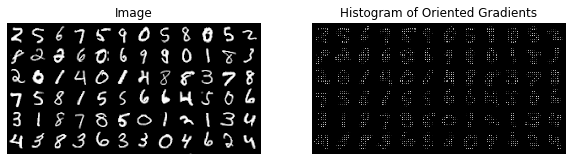

In [7]:
image = io.imread('./images/target_image.png')

image = rgb2gray(image)
imageNorm = img_as_float(image)

# Get the HOG of our image
fd, hogImage = hog(imageNorm, orientations=8, pixels_per_cell=(2, 2), cells_per_block=(4, 4), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hogImage, in_range=(0, 20))

# Show the results
figuras, ax = plt.subplots(ncols=2, nrows=1,figsize=(10,20))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')
ax[0].set_axis_off()
ax[1].imshow(hog_image_rescaled, cmap='gray')
ax[1].set_axis_off()
ax[1].set_title('Histogram of Oriented Gradients')

plt.show()


##################################################################

In [8]:
def generate_hog(img):
    """
    Realitza el HOG de la imatge passada per paràmetre
    :param img: Imatge a realiztar el HOG
    :return hog_img: Retorna el HOG de la imatge
    """
    image = img.copy()
    # Parse the image to gray and float
    image_gray = rgb2gray(image)
    image_gray_f = img_as_float(image_gray)
    # Generate the HOG and return it
    hog_img = hog(image_gray_f, orientations=8, pixels_per_cell=(4,4), cells_per_block=(2,2))
    return hog_img

def compare_hogs(template, image):
    """
    Compara un template am una image mitjançant HOG
    :param template: Template que volem utilitzar
    :param image: Imatge a trobar el template amb HOG
    """
    # Generate the HOG of the template
    hog_template = generate_hog(template)
    
    # Check how many amount of slices we will need to do
    resultX = image.shape[0]-template.shape[0]
    resultY = image.shape[1]-template.shape[1]
    
    
    # We need a PriorityQueue to know which will be our minimum distance
    pq = PriorityQueue()
    
    # Slicing with x of 5 and Y of 5
    for i in range(0,resultX,5):
        for j in range(0,resultY,5):
            
            # Get the region of the image to generate the HOG
            region = image[i:i+template.shape[0],j:j+template.shape[1]]
            hog_region = generate_hog(region)
            # Do euclidean distance with HOG of our region and our template
            hog_region_rescaled = exposure.rescale_intensity(hog_region, in_range=(0,20))
            hog_distance = np.linalg.norm(hog_region_rescaled - hog_template)
            
            # Save the information into the PriorityQueue
            info = [i, j]
            pq.put((hog_distance, info))
            
    # Get thi min of our PQ        
    inf = pq.get()[1]
    minX = inf[0]
    minY = inf[1]
    
    # Generate two rectangles for the HOG and the original image
    rect = patches.Rectangle((minY,minX), template.shape[1], template.shape[0], edgecolor='r', facecolor='none')

    # Plot the results as the exercice says
    figures, ax = plt.subplots(ncols=2, figsize=(15,20))
    ax[0].imshow(template, cmap='gray')
    ax[0].set_title("horse template")
    ax[1].imshow(image, cmap='gray')
    ax[1].add_patch(rect)
    ax[1].set_title("best region match")
    plt.show()
    
    



##################################################################

In [ ]:
image = io.imread('./images/target_image.png')
template = io.imread('./images/template.png')
compare_hogs(image, template)

## Exercise 2  (3 points)

**(a) (3 Points)** Use the ORB feature descriptor to compare the given query image (`/images/amazon_template.jpg`) to the given logo collection in the `log_collection folder`. Then, sort them out based on their similarity (i.e number of match points) to the query image. 

**Hint:** `ORB` is a function within the module `skimage.feature`. You can make use of the following given function to visualize the matches among images.

<img src="images/amazon_template.jpg" width="200" height="20">

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen ra£ndomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)

In [ ]:
##################################################################
def visualize_ORB(img1,img2,keypoints1, keypoints2, matches12):
    
    # COMPLETE
    # Plot the results
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25, 20))
    
    plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
    ax.axis('off')
    ax.set_title("Original_Amazon_LOGO_Image - Amazon_LOGO_Image_Colection")
    
    plt.show()
 ##################################################################   

In [ ]:
##################################################################
def apply_ORB(img1,img2):
   
    # COMPLETE
    # Parse images to gray and float
    img1 = rgb2gray(img1)
    img2 = rgb2gray(img2)
    img1 = img_as_float(img1)
    img2 = img_as_float(img2)
    
    # Extract descriptors
    descriptor_extractor = ORB(n_keypoints=200)
    
    # Extract the descriptor_extractor for the original_img
    descriptor_extractor.detect_and_extract(img1)
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors
    
    # Extract the descriptor_extractor for the image_colection
    descriptor_extractor.detect_and_extract(img2)
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors

    # Do the match of descriptors
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
    
    data = [img1, img2, keypoints1, keypoints2, matches12]
    
    # Devolvemos una lista 'data' con los datos que necesitamos
    # tanto para ordenar por simlaridad como para hacer el plot 
    return data
    
##################################################################

In [ ]:
# Sort images based on their similarity to the query image

# COMPLETE

# Load all the ublogos images and the original 
ub_colec = io.ImageCollection('./images/log_collection/log*')
orig_img = io.imread('./images/amazon_template.jpg')

# We will use a PQ to show in order the similarity
q = PriorityQueue()

# For every starbucks image in the colection

for i in range(len(ub_colec)):
    ub_img = ub_colec[i]
    
    data = apply_ORB(orig_img,ub_img)
    q.put((-len(data[4]), data))

# Plot the Images Taking into account their similarity
while not q.empty():
    next_item = q.get()
    # Get the similarity in %
    print('Similariry: ', abs(next_item[0]/2), '%')
    
    data = next_item[1]
    visualize_ORB(data[0], data[1], data[2], data[3], data[4])


##################################################################

## Exercise 3  (3.5 points)

Extract features from a set of images, train an AdaBoost classifier and evaluate its performance. The set of images consists of 200 training samples and 100 testing samples representing faces (positive samples) and non-faces (negative samples). The code to load the training and testing images is provided below. Complete all sections from `a)` to `d)`

In [ ]:
%matplotlib inline

import time
import numpy as np
import scipy
import skimage
from skimage import io
import os
import matplotlib.pyplot as plt
from skimage.transform import resize

pos_path_train = "./images/trainingdata/faces/"
neg_path_train = "./images/trainingdata/nonfaces/"

pos_path_test = "./images/trainingdata/faces/test/"
neg_path_test = "./images/trainingdata/nonfaces/test/"

In [ ]:
def loadImages(path):
    imgs_list = [io.imread(path+f) for f in os.listdir(path) if ".png" in f]
    
    # Do not change this line! Images must be resized for the features calculation to taking less time.
    #imgs_list = [resize(im, (50,50)) for im in imgs_list]
    return imgs_list

def plotImages(img1, img2):
    fig, ax= plt.subplots(ncols=2, nrows=1, figsize=(20,30))

    ax[0].imshow(img1)
    ax[1].imshow(img2)
    plt.show()

In [ ]:
# Load training images
pos_images_train = loadImages(pos_path_train)
neg_images_train = loadImages(neg_path_train)
# Load testing images
pos_images_test = loadImages(pos_path_test)
neg_images_test = loadImages(neg_path_test)

plotImages(pos_images_train[0], neg_images_train[0])

# Training set
print(len(pos_images_train), len(neg_images_train))
# Testing set
print(len(pos_images_test), len(neg_images_test))

**(a) (1 point)** Load the filter banks provided and extract features on the grayscale version of the `train` and `test` images.

You should have a resulting matrix for the training set with a size of (200, 49), 200 images and 49 features per image. And a resulting matrix for the test set with a size of (100, 49), 100 images and 49 features per images.

In [ ]:
# Import filters
import LM_filters
filter_bank = LM_filters.makeLMfilters()

# TRAINING set
# Join all images in a list
train_images = neg_images_train + pos_images_train
# Obtain class labels
train_labels = list(np.zeros(len(neg_images_train))) + list(np.ones(len(pos_images_train)))
train_labels = [int(l) for l in train_labels]

# TESTING set
# Join all images in a list
test_images = neg_images_test + pos_images_test
# Obtain class labels
test_labels = list(np.zeros(len(neg_images_test))) + list(np.ones(len(pos_images_test)))
test_labels = [int(l) for l in test_labels]


In [ ]:
def features_from_filter_bank(image, filter_bank, n_filters):
    # COMPLETE

    return features_for_im

def getImageFeatures(all_images,  filter_bank):
    # COMPLETE
        
    return all_feature_vectors

In [ ]:
%%time
train_features = getImageFeatures(train_images, filter_bank)
test_features = getImageFeatures(test_images, filter_bank)

# It takes around 6 min to extract the features of both train and test samples.

**(b) (1 point)** We will use the class `sklearn.ensemble.AdaBoostClassifier` to implement a classifier for predicting the output of new samples. The class is used to train the classifier, and after that, to generate the probability that a given sample corresponds to a face. If the probability is above a given threshold, then the sample is classified as a face.

#### The implementation is given below, however, you should complete the code of two functions:

- `predLabelsFromFaceProbs(isFaceProbs, threshold)`: given a list with the probability of each sample being a face, this function returns a list of labels for the samples. For a given sample, the label will be 1 if the corresponding probability is above the threshold and zero otherwise.

- `predictAdaboost(classifier, features, threshold)`: this function obtains the predicted classes for a list of features given a classifier, a list of features for each sample and a threshold. For this purpose, the probability of face for each sample should be obtained. Once we have the probabilities, they are used to predict the labels according to the given threshold.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def trainAdaboost(features, true_labels):
    classifier = AdaBoostClassifier()
    classifier.fit(features, true_labels)
    return classifier

def getProbsAdaboost(classifier, features):
    return classifier.predict_proba(features)

def getIsFaceProbs(classifier, features):
    probsAdaboost = getProbsAdaboost(classifier, features)
    isFaceProbs = []
    for p in probsAdaboost:
        isFaceProbs.append(p[1])
    return isFaceProbs
    
def predLabelsFromFaceProbs(isFaceProbs, threshold=0.5):
    labels = []
    # COMPLETE

    return labels

def predictAdaboost(classifier, features, threshold=0.5):
    # COMPLETE

adaboost = trainAdaboost(train_features, train_labels)

threshold = 0.5
predicted_train_labels = predictAdaboost(adaboost, train_features, threshold)
predicted_test_labels = predictAdaboost(adaboost, test_features, threshold)

**(c) (1.5 points)** Implement a function for calculating the prediction sensitivity given a set of true labels and a set of predicted labels. Sensitivity is obtained as the number correctly classified faces divided by the number of true faces (remember, faces have 1 as label).

In [ ]:
def sensitivity(true_labels, predicted_labels):
    # COMPLETE

    return sen

# Print training sensitivity
# COMPLETE
# Print testing sensitivity
# COMPLETE